# Tensorbard Tutorial
## 0. Introduction

Tensorboard is an extension of the TensorFlow containing tools for **visualizing** and **tracking** your model's training.

Tensorboard runs parallel to your application, serving a local/remote web application that can be displayed on your browser and embedded (from TensorFlow 2.0) in Jupiter notebooks. 

Even though Tensorboard was made to be incorporated along **TensorFlow** applications, we can also use it on **Pytorch**.

This is an in-deep serial of tutorials covering the following topics:

- How to begin using Tensorboard
- Tracking metrics 
- Images
- Computing graph visualization
- Visualizing weights and biases
- Matplotlib compatibility 
- Reading logs
- Profiler

## Get started

Tensorboard (TB) is already included when you install the TensorFlow library. As we said before, TB can also be used on Pytorch. However, in this tutorials we use TensorFlow for building deep learning models.

In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf

tf.__version__

2022-05-23 15:51:33.090505: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-05-23 15:51:33.090524: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


'2.8.0'

First we load `MNIST` data from `tf.keras.datasets`

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [3]:
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

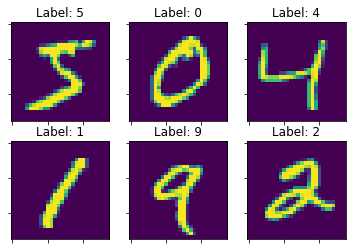

In [4]:
fig, axes = plt.subplots(2, 3)

for index, ax in enumerate(axes.flatten()):
    ax.imshow(x_train[index])
    ax.set_title('Label: {}'.format(y_train[index]))
    ax.set_yticklabels([])
    ax.set_xticklabels([])
plt.show()

We will use a CNN classifier for testing TB. The model definition can be found in `./toy_model.py`. We will also use this model for future tutorials. 

In [5]:
from toy_model import create_model
%load_ext autoreload
%autoreload 2

In [6]:
n_classes = tf.unique(y_test).y.shape[0]
model = create_model(n_classes)

2022-05-23 15:51:34.859972: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-05-23 15:51:34.859993: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-05-23 15:51:34.860005: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (appa): /proc/driver/nvidia/version does not exist
2022-05-23 15:51:34.860235: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


We compile our model using `Adam()` optimizer and `CategoricalCrossEntropy()`

In [7]:
optimizer = tf.keras.optimizers.Adam()
loss = tf.keras.losses.CategoricalCrossentropy(from_logits=True)
model.compile(loss=loss, optimizer=optimizer, metrics=["accuracy"])

The easiest way to use TB is via [**callbacks**](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks). Callbacks are objects/functions running together with our model. Generally, they are triggered after an epoch or forward step.   

Let's take a look into the [TB callback](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/TensorBoard)

In [9]:
from tensorflow.keras.callbacks import TensorBoard

tb_cback = TensorBoard(log_dir='logs', update_freq='epoch')

Before training we need to reshape `x_train` and `y_train` in order to satisfies our network's architecture.

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 10)                1

In [11]:
x_train_net = tf.expand_dims(x_train, axis=3)
y_train_net = tf.one_hot(y_train, n_classes)

x_train_net.shape, y_train_net.shape

(TensorShape([60000, 28, 28, 1]), TensorShape([60000, 10]))

A log folder (called `log_dir='logs'`) will be automatically create when we start training

In [12]:
%%time
history = model.fit(x_train_net, 
                    y_train_net, 
                    batch_size=256, 
                    epochs=10, 
                    validation_split=0.2,
                    callbacks=[tb_cback])

Epoch 1/10
188/188 [==============================] - 8s 42ms/step - loss: 1.9047 - accuracy: 0.8513 - val_loss: 0.2323 - val_accuracy: 0.9458
Epoch 2/10
188/188 [==============================] - 8s 41ms/step - loss: 0.1650 - accuracy: 0.9595 - val_loss: 0.1546 - val_accuracy: 0.9632
Epoch 3/10
188/188 [==============================] - 8s 40ms/step - loss: 0.0950 - accuracy: 0.9731 - val_loss: 0.1245 - val_accuracy: 0.9674
Epoch 4/10
188/188 [==============================] - 9s 45ms/step - loss: 0.0648 - accuracy: 0.9811 - val_loss: 0.0976 - val_accuracy: 0.9751
Epoch 5/10
188/188 [==============================] - 9s 47ms/step - loss: 0.0472 - accuracy: 0.9863 - val_loss: 0.1024 - val_accuracy: 0.9733
Epoch 6/10
188/188 [==============================] - 9s 47ms/step - loss: 0.0373 - accuracy: 0.9890 - val_loss: 0.0832 - val_accuracy: 0.9801
Epoch 7/10
188/188 [==============================] - 9s 47ms/step - loss: 0.0272 - accuracy: 0.9920 - val_loss: 0.0814 - val_accuracy: 0.9812

open your terminal and type:
```
tensorboard --logdir <logs directory>
```
In this case we define `<logs directory>` is `logs`.

Alternatevely, we can load our tensorboard results on jupyter notebook by loading TB extension,

In [17]:
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


and serving the web app:

In [18]:
%tensorboard --logdir logs

Reusing TensorBoard on port 6008 (pid 8370), started 0:01:21 ago. (Use '!kill 8370' to kill it.)

If you are running TB remotely you also have tu specify the `host` and the opened `port`
```
tensorboard --logdir logs --host 0.0.0.0 --port 6006
```
Then, in your browser you can open the link by typing: 

```
http://my_public_ip:6006/
```


## [Bonus] Custom training loops (lower level)

Using TB on Keras-based models is fast and easy to implement. However, sometimes we must use [custom training loops](https://www.tensorflow.org/guide/keras/writing_a_training_loop_from_scratch) to incorporate more sophisticated features into our training.

In [137]:
from toy_model import train_step, test_step
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In this case we **can not use the TB callback**. Instead we will use the `tf.summary` package that contains TB tools for tracking runs.

In [138]:
from tensorflow.summary import create_file_writer
from sklearn.model_selection import train_test_split

In [139]:
log_dir = './logs_2'
train_writer = create_file_writer('{}/train'.format(log_dir))
val_writer   = create_file_writer('{}/val'.format(log_dir))

we also have to create our validation split

In [140]:
x_train_ds, x_val_ds, \
y_train_ds, y_val_ds = train_test_split(x_train_net.numpy(), 
                                        y_train_net.numpy(), 
                                        test_size=0.2)

train_ds  = tf.data.Dataset.from_tensor_slices((x_train_ds, 
                                                y_train_ds))
train_ds  = train_ds.batch(256)

val_ds  = tf.data.Dataset.from_tensor_slices((x_val_ds, 
                                              y_val_ds))
val_ds  = val_ds.batch(256)

We reset the optimizer and models weights to avoid overfitting from the last experiment

In [141]:
optimizer = tf.keras.optimizers.Adam()

In [142]:
model = create_model(n_classes)

Finally we start training and saving our logs using `tf.summary.scalar`

In [143]:
%%time
for epoch in range(10):
    train_losses, train_accs = [], []
    for x, y in train_ds:
        t_loss, t_acc = train_step(model, x, y, optimizer)
        train_losses.append(t_loss)
        train_accs.append(t_acc)
        
    val_losses, val_accs = [], []
    for x, y in val_ds:
        v_loss, v_acc = test_step(model, x, y)
        val_losses.append(v_loss)
        val_accs.append(v_acc)
        
    # Load to Tensorboard
    with train_writer.as_default():
        tf.summary.scalar('loss',
                          tf.reduce_mean(train_losses), 
                          step=epoch)
        tf.summary.scalar('accuracy',
                          tf.reduce_mean(train_accs), 
                          step=epoch)

    # Load to Tensorboard
    with val_writer.as_default():
        tf.summary.scalar('loss',
                          tf.reduce_mean(val_losses), 
                          step=epoch)
        tf.summary.scalar('accuracy',
                          tf.reduce_mean(val_accs), 
                          step=epoch)

CPU times: user 10min 40s, sys: 32.5 s, total: 11min 12s
Wall time: 1min 58s


`tf.summary` also includes [another kinds of formats](https://www.tensorflow.org/api_docs/python/tf/summary#functions_2) such as audio, images, graphs...

We will see more examples on future tutorials